# **Catatan**

- Kode program 2 adalah kalian tinggal running kode ini agar dapat melihat training dengan data asli dibersihkan, kemudian dievaluasi hasilnya dan dicatat. (running sendiri ya)
- hasil training dengan data bersih (classification non-tuning) dibandingkan dengan hasil training data bersih menggunakan hyperparameter tuning
- metric evaluasinya harus ada accuracy, precision, recall, dan f1-score

Kode ini untuk Topik ini:
- Ransomware Detection Using Transformer
Topik Riset 1:
"Studi Transformer-Based Sequence Modelling untuk Deteksi Ransomware Melalui Analisis Trafik Jaringan yang Mengenkripsi Secara Tiba-tiba"
Deskripsi:
Model Transformer dilatih untuk mendeteksi pola enkripsi yang tiba-tiba dalam trafik jaringan. Dengan memanfaatkan arsitektur Transformer, model dapat mengenali urutan paket data yang menunjukkan aktivitas enkripsi ransomware secara dini sebelum terjadi dampak serius.
Novelty: Tinggi. Penggunaan Transformer untuk mendeteksi pola enkripsi ransomware yang tiba-tiba dalam trafik jaringan belum banyak dieksplorasi secara spesifik. Transformer memiliki kemampuan menangani urutan data panjang dan deteksi pola, sehingga bisa menghadirkan pendekatan baru dalam prediksi serangan ransomware.
Dataset: Android Ransomeware Detection
Dataset ini mencakup trafik yang mencakup berbagai serangan jaringan, termasuk backdoor, yang relevan untuk deteksi ransomware. Model Transformer dapat dilatih menggunakan pola trafik berbahaya dari dataset ini untuk mendeteksi aktivitas enkripsi ransomware.
Dataset: Android Ransomeware Detection

# **Importing Modules and Libraries**

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# **Importing Datasets**

Mount Google Drive:

Digunakan untuk mengakses file yang disimpan di Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
!ls


Mounted at /content/gdrive
gdrive	sample_data


Mengubah direktori kerja:

Ini digunakan untuk berpindah ke folder tempat dataset Anda berada.

In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/Android-Ransomeware")
!ls


Android_Ransomeware.csv     model_best_fold_10.pt  model_best_fold_5.pt  model_fold_1.pth
final_model_ori.pth	    model_best_fold_1.pt   model_best_fold_6.pt  model_fold_2.pth
final_model.pth		    model_best_fold_2.pt   model_best_fold_7.pt  model_fold_3.pth
final_model_tuning_ori.pth  model_best_fold_3.pt   model_best_fold_8.pt
final_model_tuning.pth	    model_best_fold_4.pt   model_best_fold_9.pt


Memuat dataset:

Dataset UNSW_NB15.csv dimuat ke dalam variabel data.

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Android-Ransomeware/Android_Ransomeware.csv')



Menampilkan informasi awal tentang data:

Menampilkan 5 baris pertama dari dataset dan informasi tentang tipe data, jumlah entri, dan kolom yang ada di dalam dataset.

In [ ]:
data.head(n=5)


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [ ]:
print(data['Label'].value_counts())


Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


In [ ]:
# Hitung distribusi label
label_counts = data['Label'].value_counts()
print(label_counts)


Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


In [ ]:
data.shape


(392034, 86)

Ini adalah proses atau tahapan persiapan data yang baik sebelum dilanjutkan ke tahap analisis atau pemodelan.

# **Data Visualization**

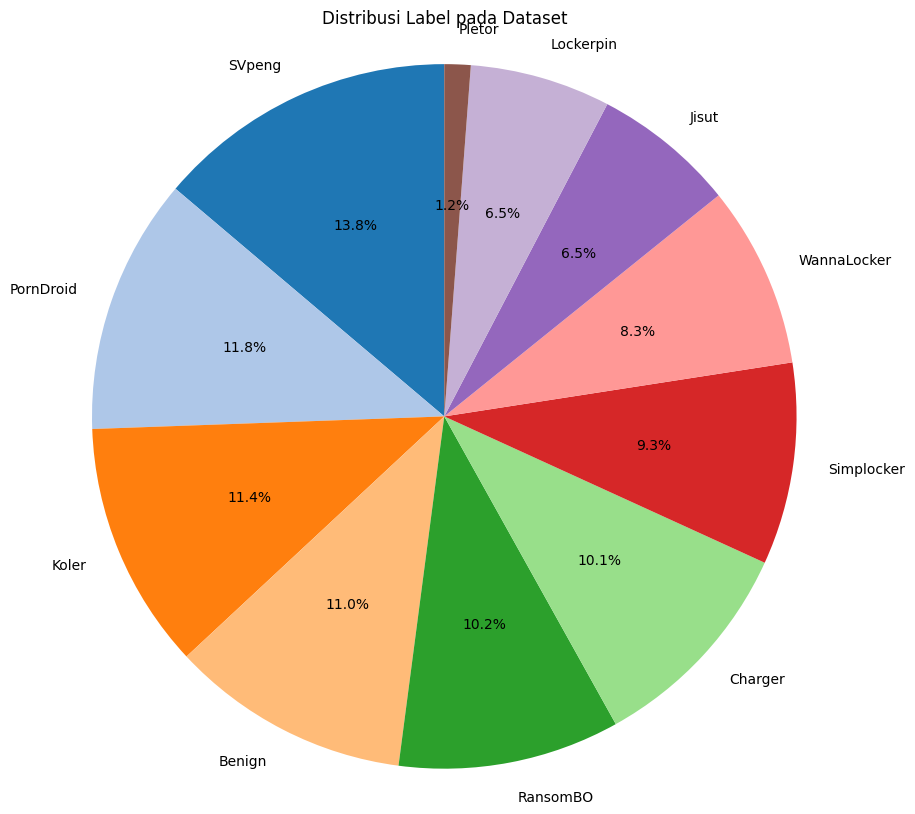

In [ ]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors  # Menggunakan palet warna yang bervariasi
)
plt.title('Distribusi Label pada Dataset')
plt.axis('equal')  # Membuat pie chart berbentuk lingkaran
plt.show()


In [ ]:
# Melihat nilai unik dari kolom Label
unique_labels = data['Label'].unique()
print("Nilai Unik dalam Label:", unique_labels)


Nilai Unik dalam Label: ['Benign' 'Charger' 'Jisut' 'Koler' 'Lockerpin' 'Pletor' 'PornDroid'
 'RansomBO' 'Simplocker' 'SVpeng' 'WannaLocker']


In [ ]:
# Menghitung jumlah setiap kelas dalam Label
label_counts = data['Label'].value_counts()
print("Distribusi Kelas:\n", label_counts)


Distribusi Kelas:
 Label
SVpeng         54161
PornDroid      46082
Koler          44555
Benign         43091
RansomBO       39859
Charger        39551
Simplocker     36340
WannaLocker    32701
Jisut          25672
Lockerpin      25307
Pletor          4715
Name: count, dtype: int64


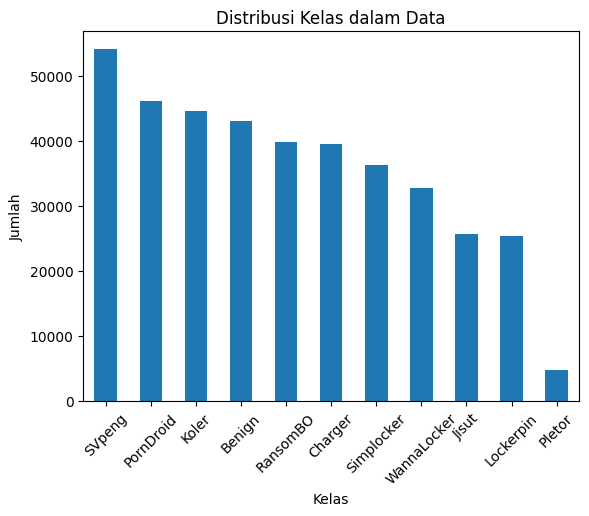

In [ ]:
import matplotlib.pyplot as plt

# Membuat diagram batang untuk distribusi kelas
label_counts.plot(kind='bar')
plt.title('Distribusi Kelas dalam Data')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()


# **LIBRARY TRANSFORMER**

Instalasi Paket yang Diperlukan

Instalasi paket: Menginstal berbagai paket yang diperlukan untuk pembelajaran mesin dan pemrosesan data.

In [ ]:
!pip install transformers tensorflow scikit-learn matplotlib pandas


# **1. TRANSFORMER "FS"**

# **CLASSIFICATION Non-Tuning**

ini dirunning sendiri ya

In [ ]:
!pip install imbalanced-learn seaborn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding
bin_label = pd.DataFrame(data["Label"].map(lambda x:'normal' if x=="Benign" else 'abnormal'))

bin_data = data.copy()
bin_data["Label"] = bin_label

# Data Preparation (Assuming 'bin_data' DataFrame is available)
bin_data.drop_duplicates(inplace=True)

# Encode non-numeric columns
for column in bin_data.columns:
    if bin_data[column].dtype == 'object':
        le = LabelEncoder()
        bin_data[column] = le.fit_transform(bin_data[column].astype(str))

# Handle missing values
for column in bin_data.select_dtypes(include=np.number).columns:
    bin_data[column] = bin_data[column].fillna(bin_data[column].mean())

# Prepare Data for SMOTE
X = bin_data.drop(columns=['Label'])
y = bin_data['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


Fold 1
Accuracy for fold 1: 98.13%
F1 Score for fold 1: 0.9809
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     93093
           1       0.96      0.87      0.91     11450

    accuracy                           0.98    104543
   macro avg       0.97      0.93      0.95    104543
weighted avg       0.98      0.98      0.98    104543

Fold 2
Accuracy for fold 2: 97.58%
F1 Score for fold 2: 0.9749
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     92951
           1       0.96      0.82      0.88     11591

    accuracy                           0.98    104542
   macro avg       0.97      0.91      0.93    104542
weighted avg       0.98      0.98      0.97    104542

Fold 3
Accuracy for fold 3: 97.90%
F1 Score for fold 3: 0.9787
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     93112
           1       0.93      0.87      0.90     

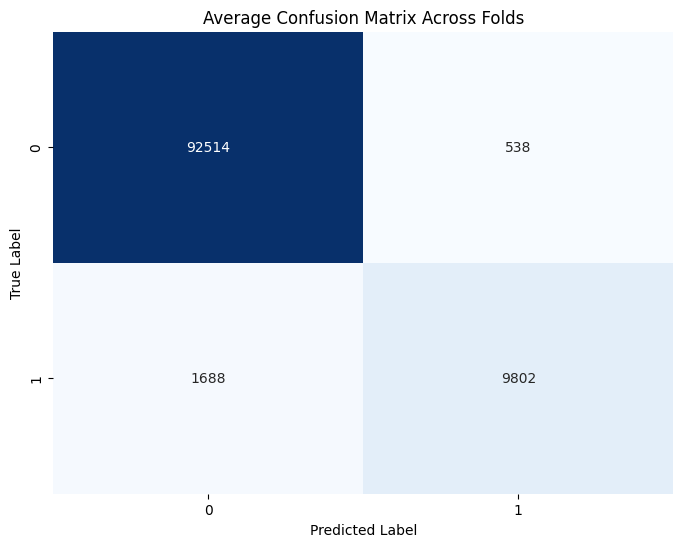

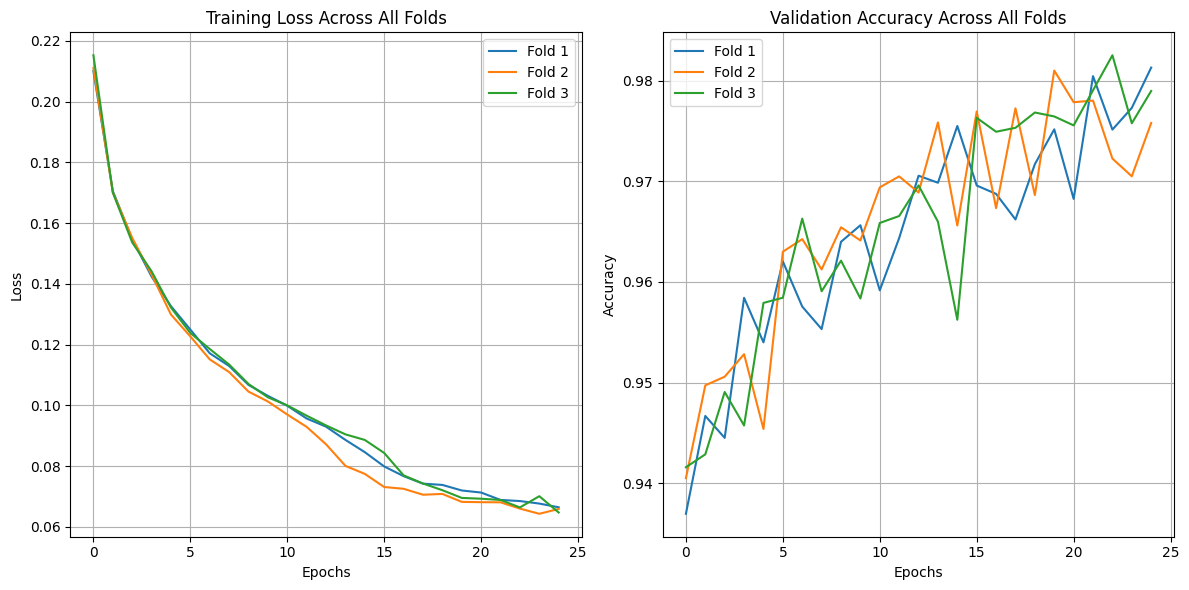

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 98.13%, F1 Score = 0.9809
Fold 2: Akurasi = 97.58%, F1 Score = 0.9749
Fold 3: Akurasi = 97.90%, F1 Score = 0.9787


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding
le1 = LabelEncoder()
y_train_encoded = le1.fit_transform(y_train)
class_names = [str(class_name) for class_name in le1.classes_]

# Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()
        self.feature_embedding = nn.Linear(input_dim, d_model)
        self.feature_attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.feature_embedding(x)
        x = x.unsqueeze(1)
        x, _ = self.feature_attention(x, x, x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.fc(x)

# KFold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=50)
all_train_losses, all_val_accuracies = [], []
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train_encoded[train_index], y_train_encoded[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_fold.values)
    y_train_tensor = torch.LongTensor(y_train_fold)
    X_val_tensor = torch.FloatTensor(X_val.values)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train the model without early stopping
    num_epochs = 25
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            if len(inputs.shape) == 1:
                inputs = inputs.unsqueeze(0)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Store losses and accuracies for the fold
    all_train_losses.append(train_losses)
    all_val_accuracies.append(val_accuracies)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

# Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# Plot Combined Loss and Accuracy Across All Folds
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
for fold, losses in enumerate(all_train_losses):
    plt.plot(losses, label=f'Fold {fold + 1}')
plt.title('Training Loss Across All Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
for fold, accuracies in enumerate(all_val_accuracies):
    plt.plot(accuracies, label=f'Fold {fold + 1}')
plt.title('Validation Accuracy Across All Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')


Fold 1
Accuracy for fold 1: 98.27%
F1 Score for fold 1: 0.9826
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     93093
           1       0.93      0.91      0.92     11450

    accuracy                           0.98    104543
   macro avg       0.96      0.95      0.96    104543
weighted avg       0.98      0.98      0.98    104543



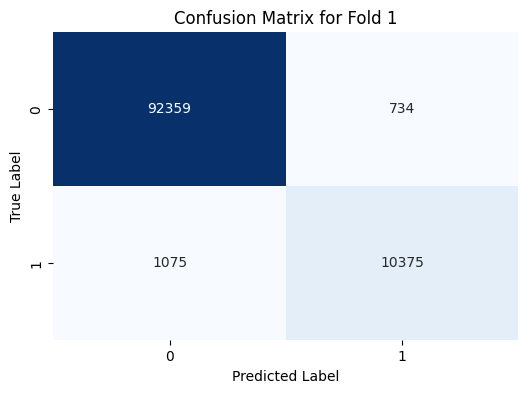

Fold 2
Accuracy for fold 2: 98.21%
F1 Score for fold 2: 0.9821
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     92951
           1       0.92      0.92      0.92     11591

    accuracy                           0.98    104542
   macro avg       0.95      0.95      0.95    104542
weighted avg       0.98      0.98      0.98    104542



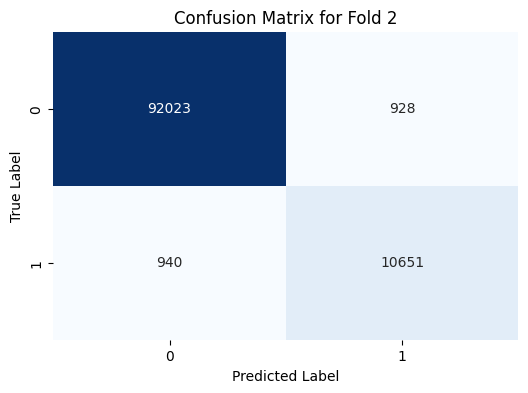

Fold 3
Accuracy for fold 3: 97.72%
F1 Score for fold 3: 0.9768
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     93112
           1       0.93      0.86      0.89     11430

    accuracy                           0.98    104542
   macro avg       0.96      0.92      0.94    104542
weighted avg       0.98      0.98      0.98    104542



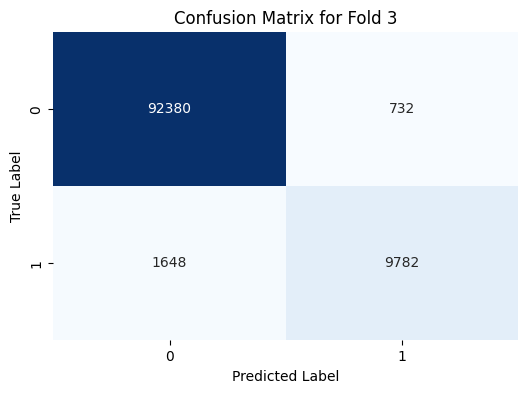

Average Accuracy: 98.07%
Average F1 Score: 0.9805


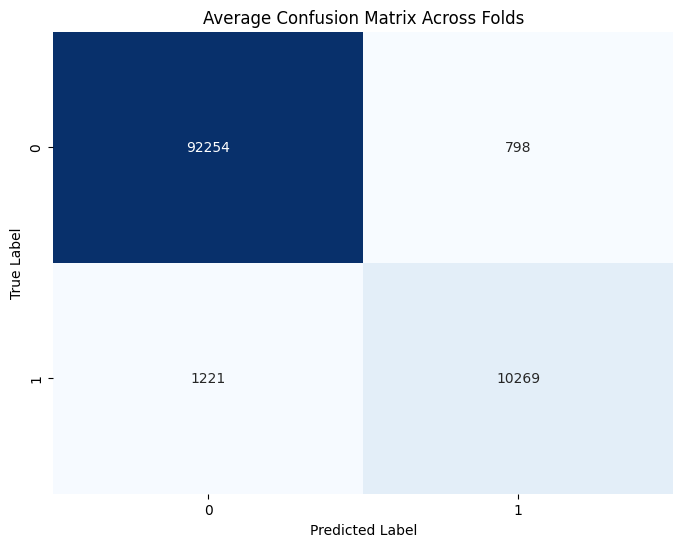

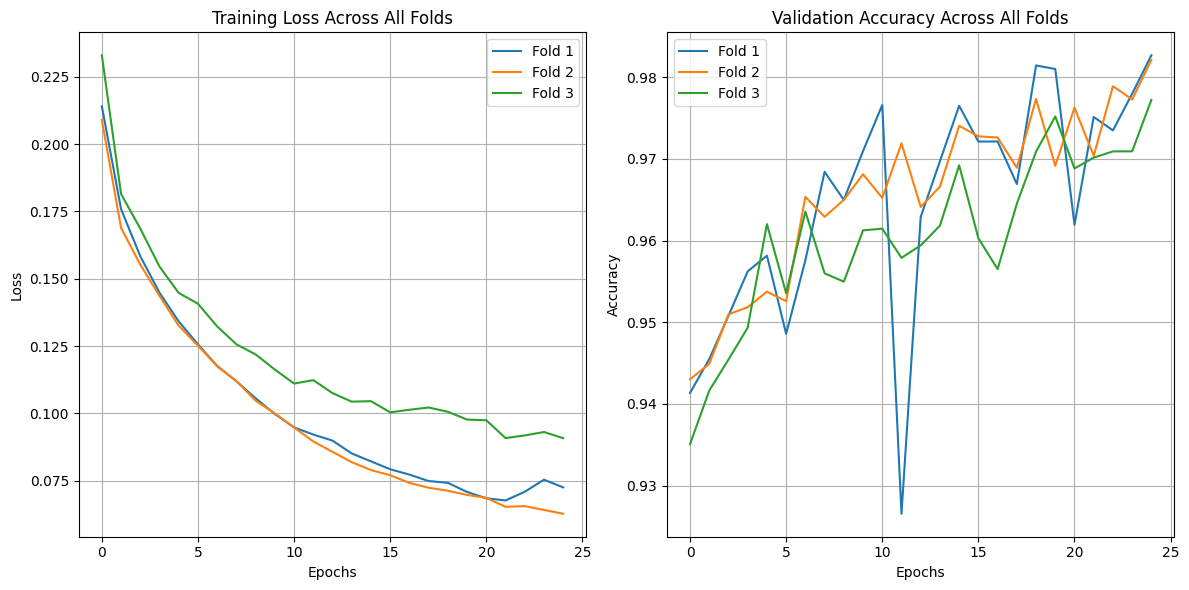

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 98.27%, F1 Score = 0.9826
Fold 2: Akurasi = 98.21%, F1 Score = 0.9821
Fold 3: Akurasi = 97.72%, F1 Score = 0.9768


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding
le1 = LabelEncoder()
y_train_encoded = le1.fit_transform(y_train)
class_names = [str(class_name) for class_name in le1.classes_]

# Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()
        self.feature_embedding = nn.Linear(input_dim, d_model)
        self.feature_attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.feature_embedding(x)
        x = x.unsqueeze(1)
        x, _ = self.feature_attention(x, x, x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.fc(x)

# KFold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=50)
all_train_losses, all_val_accuracies = [], []
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train_encoded[train_index], y_train_encoded[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_fold.values)
    y_train_tensor = torch.LongTensor(y_train_fold)
    X_val_tensor = torch.FloatTensor(X_val.values)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Train the model without early stopping
    num_epochs = 25
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            if len(inputs.shape) == 1:
                inputs = inputs.unsqueeze(0)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Store losses and accuracies for the fold
    all_train_losses.append(train_losses)
    all_val_accuracies.append(val_accuracies)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# Plot Combined Loss and Accuracy Across All Folds
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
for fold, losses in enumerate(all_train_losses):
    plt.plot(losses, label=f'Fold {fold + 1}')
plt.title('Training Loss Across All Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
for fold, accuracies in enumerate(all_val_accuracies):
    plt.plot(accuracies, label=f'Fold {fold + 1}')
plt.title('Validation Accuracy Across All Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')


In [ ]:
# Save the final model trained on all folds
torch.save(model.state_dict(), 'final_model_ori.pth')
print("Final model saved as final_model.pth")

Final model saved as final_model.pth


<ipython-input-16-5724eb0d3059>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('final_model_ori.pth'))


Accuracy: 97.82%
F1 Score: 0.9778
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     69787
           1       0.94      0.86      0.90      8620

    accuracy                           0.98     78407
   macro avg       0.96      0.93      0.94     78407
weighted avg       0.98      0.98      0.98     78407



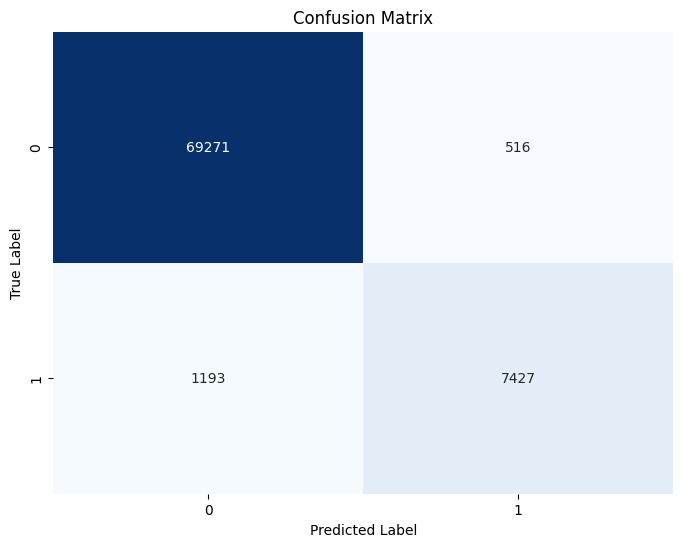

In [ ]:
# Load Testing Data (Assume X_test and y_test are preprocessed and available)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.LongTensor(y_test.values)

# Load Model for Prediction
# Initialize the model with the same parameters as used during training
model = FSTransformerModel(input_dim=X_test_tensor.shape[1], num_classes=len(class_names))

# Load the trained model weights (replace 'model.pth' with the actual saved model path)
model.load_state_dict(torch.load('final_model_ori.pth'))
model.eval()

# Perform Prediction
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    _, y_pred = torch.max(y_pred_probs, 1)

# Convert predictions to numpy array
y_pred_np = y_pred.numpy()

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_np)
f1 = f1_score(y_test, y_pred_np, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_np)

# Print Metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_np, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import files
files.download('final_model_ori.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Hyperparameter Tuning**

In [ ]:
import itertools
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
# Define the hyperparameters grid
param_grid = {
    'lr': [0.001, 0.0005],
    'batch_size': [16, 32],
    'nhead': [2, 4]
}

# Track the best model
best_accuracy = 0
best_params = None

# Loop over all combinations of hyperparameters
for lr, batch_size, nhead in itertools.product(param_grid['lr'],
                                               param_grid['batch_size'],
                                               param_grid['nhead']):
    print(f'Training with lr={lr}, batch_size={batch_size}, nhead={nhead}')

    # Reinitialize model with new hyperparameters, ensuring consistent d_model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names),
                             d_model=128, nhead=nhead, num_layers=3, dropout=0.3) # Keep d_model consistent


    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Train for 2 epochs (for quick demonstration)
    for epoch in range(2):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Validate and calculate accuracy
    model.eval()
    with torch.no_grad():
        y_pred_probs = model(X_val_tensor)
        _, y_pred = torch.max(y_pred_probs, 1)
        accuracy = accuracy_score(y_val, y_pred.numpy())

    print(f'Validation Accuracy: {accuracy * 100:.2f}%')

    # Save best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'lr': lr, 'batch_size': batch_size, 'nhead': nhead}

print(f'Best Params: {best_params} with Accuracy: {best_accuracy * 100:.2f}%')


Training with lr=0.001, batch_size=16, nhead=2
Validation Accuracy: 89.07%
Training with lr=0.001, batch_size=16, nhead=4
Validation Accuracy: 89.07%
Training with lr=0.001, batch_size=32, nhead=2
Validation Accuracy: 89.07%
Training with lr=0.001, batch_size=32, nhead=4
Validation Accuracy: 89.07%
Training with lr=0.0005, batch_size=16, nhead=2
Validation Accuracy: 94.13%
Training with lr=0.0005, batch_size=16, nhead=4
Validation Accuracy: 93.82%
Training with lr=0.0005, batch_size=32, nhead=2
Validation Accuracy: 94.43%
Training with lr=0.0005, batch_size=32, nhead=4
Validation Accuracy: 94.30%
Best Params: {'lr': 0.0005, 'batch_size': 32, 'nhead': 2} with Accuracy: 94.43%


# **CLASSIFICATION With Hyperparameter Tuning**
(ganti parameter sesuai yang terbaik hasil hyperparameter tuning ya)

Fold 1
Accuracy for fold 1: 89.05%
F1 Score for fold 1: 0.8389
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     93093
           1       0.00      0.00      0.00     11450

    accuracy                           0.89    104543
   macro avg       0.45      0.50      0.47    104543
weighted avg       0.79      0.89      0.84    104543

Fold 2


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy for fold 2: 88.91%
F1 Score for fold 2: 0.8369
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     92951
           1       0.00      0.00      0.00     11591

    accuracy                           0.89    104542
   macro avg       0.44      0.50      0.47    104542
weighted avg       0.79      0.89      0.84    104542

Fold 3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy for fold 3: 89.07%
F1 Score for fold 3: 0.8392
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     93112
           1       0.00      0.00      0.00     11430

    accuracy                           0.89    104542
   macro avg       0.45      0.50      0.47    104542
weighted avg       0.79      0.89      0.84    104542

Average Accuracy: 89.01%
Average F1 Score: 0.8383


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


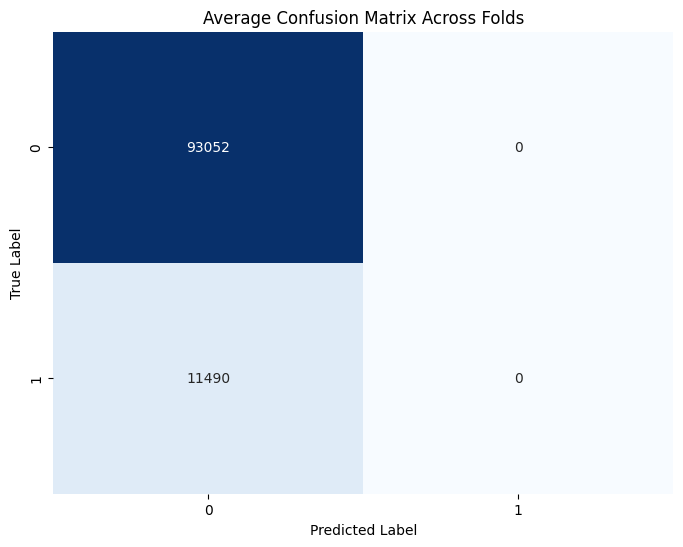

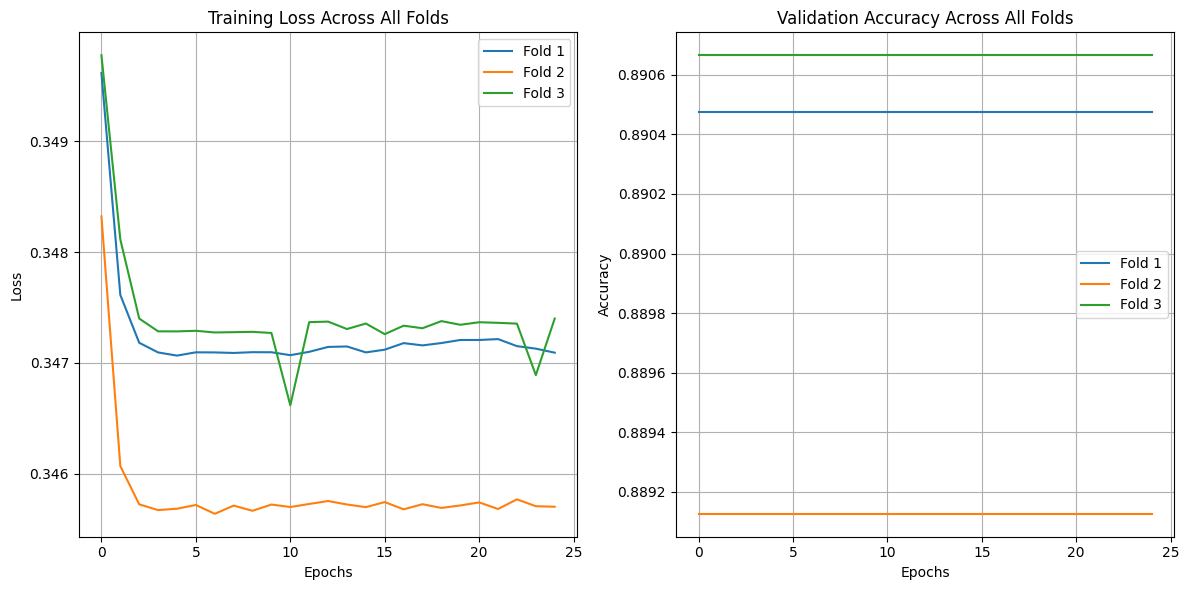

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 89.05%, F1 Score = 0.8389
Fold 2: Akurasi = 88.91%, F1 Score = 0.8369
Fold 3: Akurasi = 89.07%, F1 Score = 0.8392


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding
le1 = LabelEncoder()
y_train_encoded = le1.fit_transform(y_train)
class_names = [str(class_name) for class_name in le1.classes_]

# Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()
        self.feature_embedding = nn.Linear(input_dim, d_model)
        self.feature_attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.feature_embedding(x)
        x = x.unsqueeze(1)
        x, _ = self.feature_attention(x, x, x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.fc(x)

# KFold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=50)
all_train_losses, all_val_accuracies = [], []
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train_encoded[train_index], y_train_encoded[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_fold.values)
    y_train_tensor = torch.LongTensor(y_train_fold)
    X_val_tensor = torch.FloatTensor(X_val.values)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

    # Train the model without early stopping
    num_epochs = 25
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            if len(inputs.shape) == 1:
                inputs = inputs.unsqueeze(0)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Store losses and accuracies for the fold
    all_train_losses.append(train_losses)
    all_val_accuracies.append(val_accuracies)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

# Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# Plot Combined Loss and Accuracy Across All Folds
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
for fold, losses in enumerate(all_train_losses):
    plt.plot(losses, label=f'Fold {fold + 1}')
plt.title('Training Loss Across All Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
for fold, accuracies in enumerate(all_val_accuracies):
    plt.plot(accuracies, label=f'Fold {fold + 1}')
plt.title('Validation Accuracy Across All Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')


Fold 1
Accuracy for fold 1: 89.05%
F1 Score for fold 1: 0.8389
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     93093
           1       0.00      0.00      0.00     11450

    accuracy                           0.89    104543
   macro avg       0.45      0.50      0.47    104543
weighted avg       0.79      0.89      0.84    104543



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


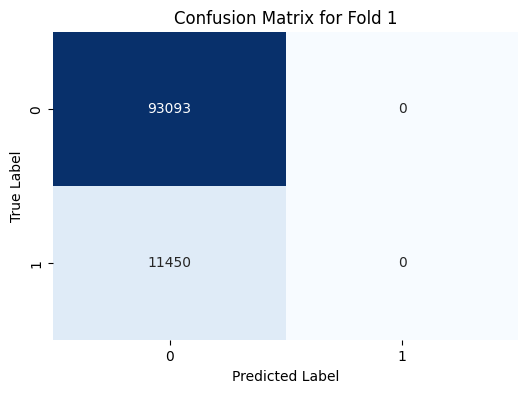

Fold 2
Accuracy for fold 2: 88.91%
F1 Score for fold 2: 0.8369
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     92951
           1       0.00      0.00      0.00     11591

    accuracy                           0.89    104542
   macro avg       0.44      0.50      0.47    104542
weighted avg       0.79      0.89      0.84    104542



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


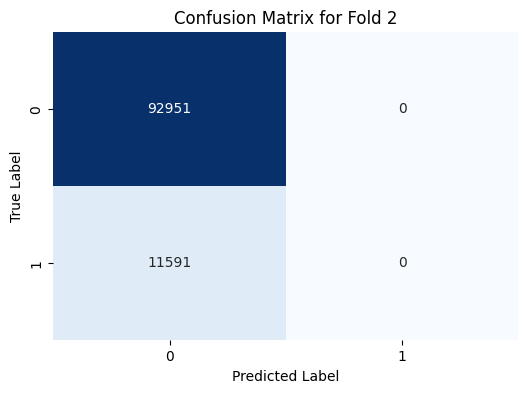

Fold 3
Accuracy for fold 3: 89.07%
F1 Score for fold 3: 0.8392
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     93112
           1       0.00      0.00      0.00     11430

    accuracy                           0.89    104542
   macro avg       0.45      0.50      0.47    104542
weighted avg       0.79      0.89      0.84    104542



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


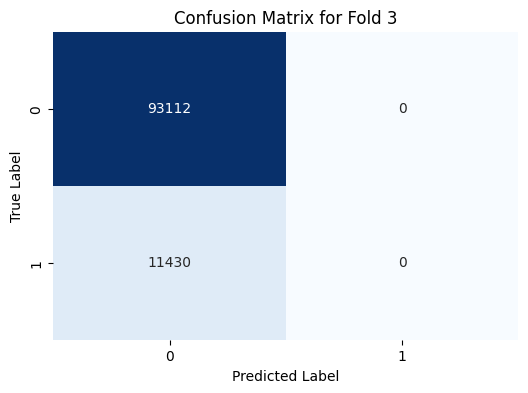

Average Accuracy: 89.01%
Average F1 Score: 0.8383


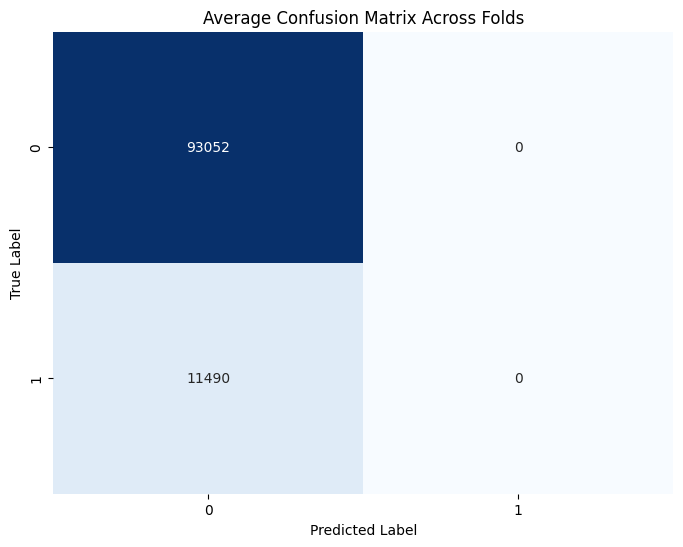

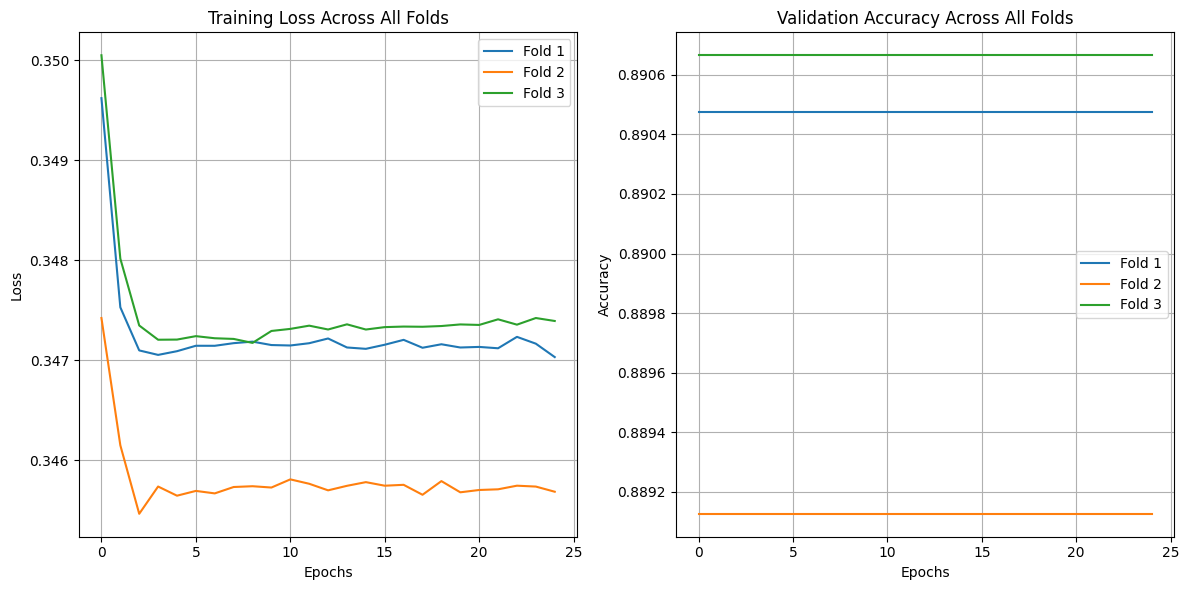

Hasil Deteksi Pola Enkripsi Ransomware:
Fold 1: Akurasi = 89.05%, F1 Score = 0.8389
Fold 2: Akurasi = 88.91%, F1 Score = 0.8369
Fold 3: Akurasi = 89.07%, F1 Score = 0.8392


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding
le1 = LabelEncoder()
y_train_encoded = le1.fit_transform(y_train)
class_names = [str(class_name) for class_name in le1.classes_]

# Define FS-Transformer Model
class FSTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=64, nhead=2, num_layers=2, dropout=0.1):
        super(FSTransformerModel, self).__init__()
        self.feature_embedding = nn.Linear(input_dim, d_model)
        self.feature_attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout, batch_first=True),
            num_layers=num_layers
        )
        self.fc = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.feature_embedding(x)
        x = x.unsqueeze(1)
        x, _ = self.feature_attention(x, x, x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        return self.fc(x)

# KFold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=50)
all_train_losses, all_val_accuracies = [], []
all_accuracy, all_f1_scores = [], []
conf_matrix_list = []

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f'Fold {fold + 1}')

    # Split data using .iloc to select rows by index
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train_encoded[train_index], y_train_encoded[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_fold.values)
    y_train_tensor = torch.LongTensor(y_train_fold)
    X_val_tensor = torch.FloatTensor(X_val.values)
    y_val_tensor = torch.LongTensor(y_val)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Initialize the FS-Transformer model
    model = FSTransformerModel(input_dim=X_train_tensor.shape[1], num_classes=len(class_names))
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

    # Train the model without early stopping
    num_epochs = 25
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            if len(inputs.shape) == 1:
                inputs = inputs.unsqueeze(0)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validate the model
        model.eval()
        with torch.no_grad():
            y_pred_probs = model(X_val_tensor)
            _, y_pred = torch.max(y_pred_probs, 1)

        accuracy = accuracy_score(y_val, y_pred.numpy())
        val_accuracies.append(accuracy)

    # Metrics calculation
    conf_matrix = confusion_matrix(y_val, y_pred.numpy())
    conf_matrix_list.append(conf_matrix)
    all_accuracy.append(accuracy)

    f1 = f1_score(y_val, y_pred.numpy(), average='weighted')
    all_f1_scores.append(f1)

    # Store losses and accuracies for the fold
    all_train_losses.append(train_losses)
    all_val_accuracies.append(val_accuracies)

    # Print results for the current fold
    print(f'Accuracy for fold {fold + 1}: {accuracy * 100:.2f}%')
    print(f'F1 Score for fold {fold + 1}: {f1:.4f}')
    cls_report = classification_report(y_val, y_pred.numpy(), target_names=class_names)
    print(cls_report)

    # Plot confusion matrix for the current fold
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for Fold {fold + 1}')
    plt.show()

# Average Metrics Across All Folds
print(f'Average Accuracy: {np.mean(all_accuracy) * 100:.2f}%')
print(f'Average F1 Score: {np.mean(all_f1_scores):.4f}')

# Plot the Average Confusion Matrix
average_conf_matrix = np.mean(conf_matrix_list, axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(average_conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix Across Folds')
plt.show()

# Plot Combined Loss and Accuracy Across All Folds
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
for fold, losses in enumerate(all_train_losses):
    plt.plot(losses, label=f'Fold {fold + 1}')
plt.title('Training Loss Across All Folds')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot Accuracy
plt.subplot(1, 2, 2)
for fold, accuracies in enumerate(all_val_accuracies):
    plt.plot(accuracies, label=f'Fold {fold + 1}')
plt.title('Validation Accuracy Across All Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Analysis of Results
print("Hasil Deteksi Pola Enkripsi Ransomware:")
for i, (acc, f1) in enumerate(zip(all_accuracy, all_f1_scores)):
    print(f'Fold {i + 1}: Akurasi = {acc * 100:.2f}%, F1 Score = {f1:.4f}')


In [ ]:
# Save the final model trained on all folds
torch.save(model.state_dict(), 'final_model_tuning_ori.pth')
print("Final model saved as final_model_tuning_ori.pth")

Final model saved as final_model_tuning_ori.pth


<ipython-input-20-a4f34c217ace>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('final_model_tuning_ori.pth'))


Accuracy: 89.01%
F1 Score: 0.8383
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     69787
           1       0.00      0.00      0.00      8620

    accuracy                           0.89     78407
   macro avg       0.45      0.50      0.47     78407
weighted avg       0.79      0.89      0.84     78407



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


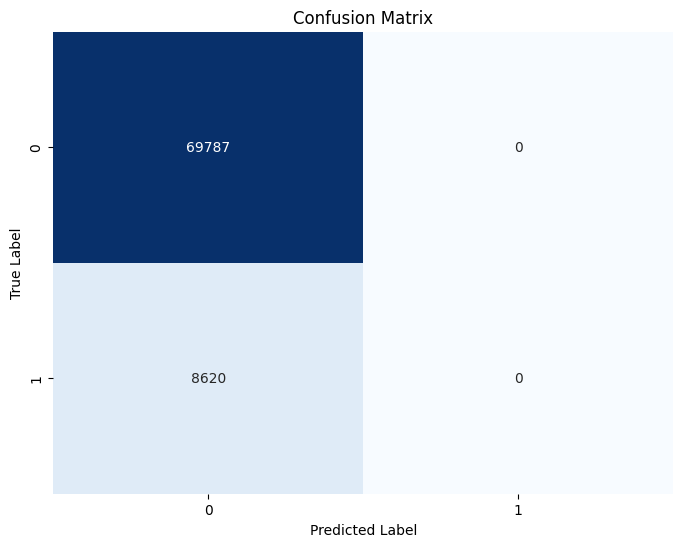

In [ ]:
# Load Testing Data (Assume X_test and y_test are preprocessed and available)
X_test_tensor = torch.FloatTensor(X_test.values)
y_test_tensor = torch.LongTensor(y_test.values)

# Load Model for Prediction
# Initialize the model with the same parameters as used during training
model = FSTransformerModel(input_dim=X_test_tensor.shape[1], num_classes=len(class_names))

# Load the trained model weights (replace 'model.pth' with the actual saved model path)
model.load_state_dict(torch.load('final_model_tuning_ori.pth'))
model.eval()

# Perform Prediction
with torch.no_grad():
    y_pred_probs = model(X_test_tensor)
    _, y_pred = torch.max(y_pred_probs, 1)

# Convert predictions to numpy array
y_pred_np = y_pred.numpy()

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred_np)
f1 = f1_score(y_test, y_pred_np, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_np)

# Print Metrics
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred_np, target_names=class_names))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.0f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from google.colab import files
files.download('final_model_tuning_ori.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>